In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\Kishan\Data Science Intership\Iris.csv")


In [3]:
print(df.head())
print("Shape",df.shape)
print(df.info())
print(df.describe)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
print("Missing values in each Columns")
print(df.isnull().sum())

Missing values in each Columns
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
print("Number of duplicate rows")
print(df.duplicated().sum())

Number of duplicate rows
0


In [6]:
print("Species count")
print(df['Species'].value_counts())

Species count
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


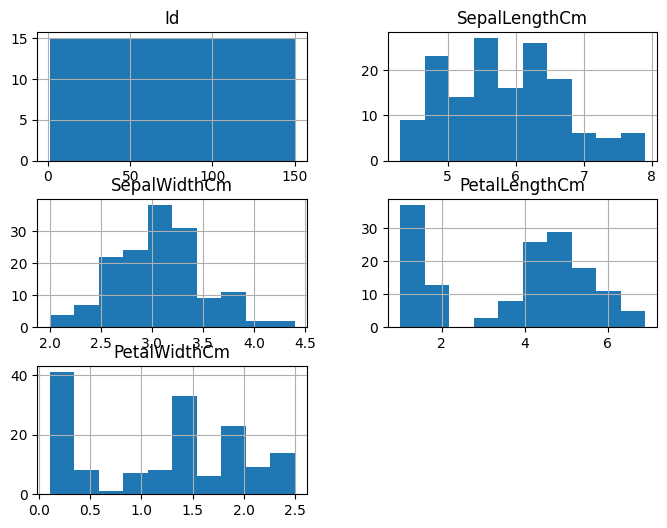

In [7]:
df.hist(figsize=(8,6))
plt.show()

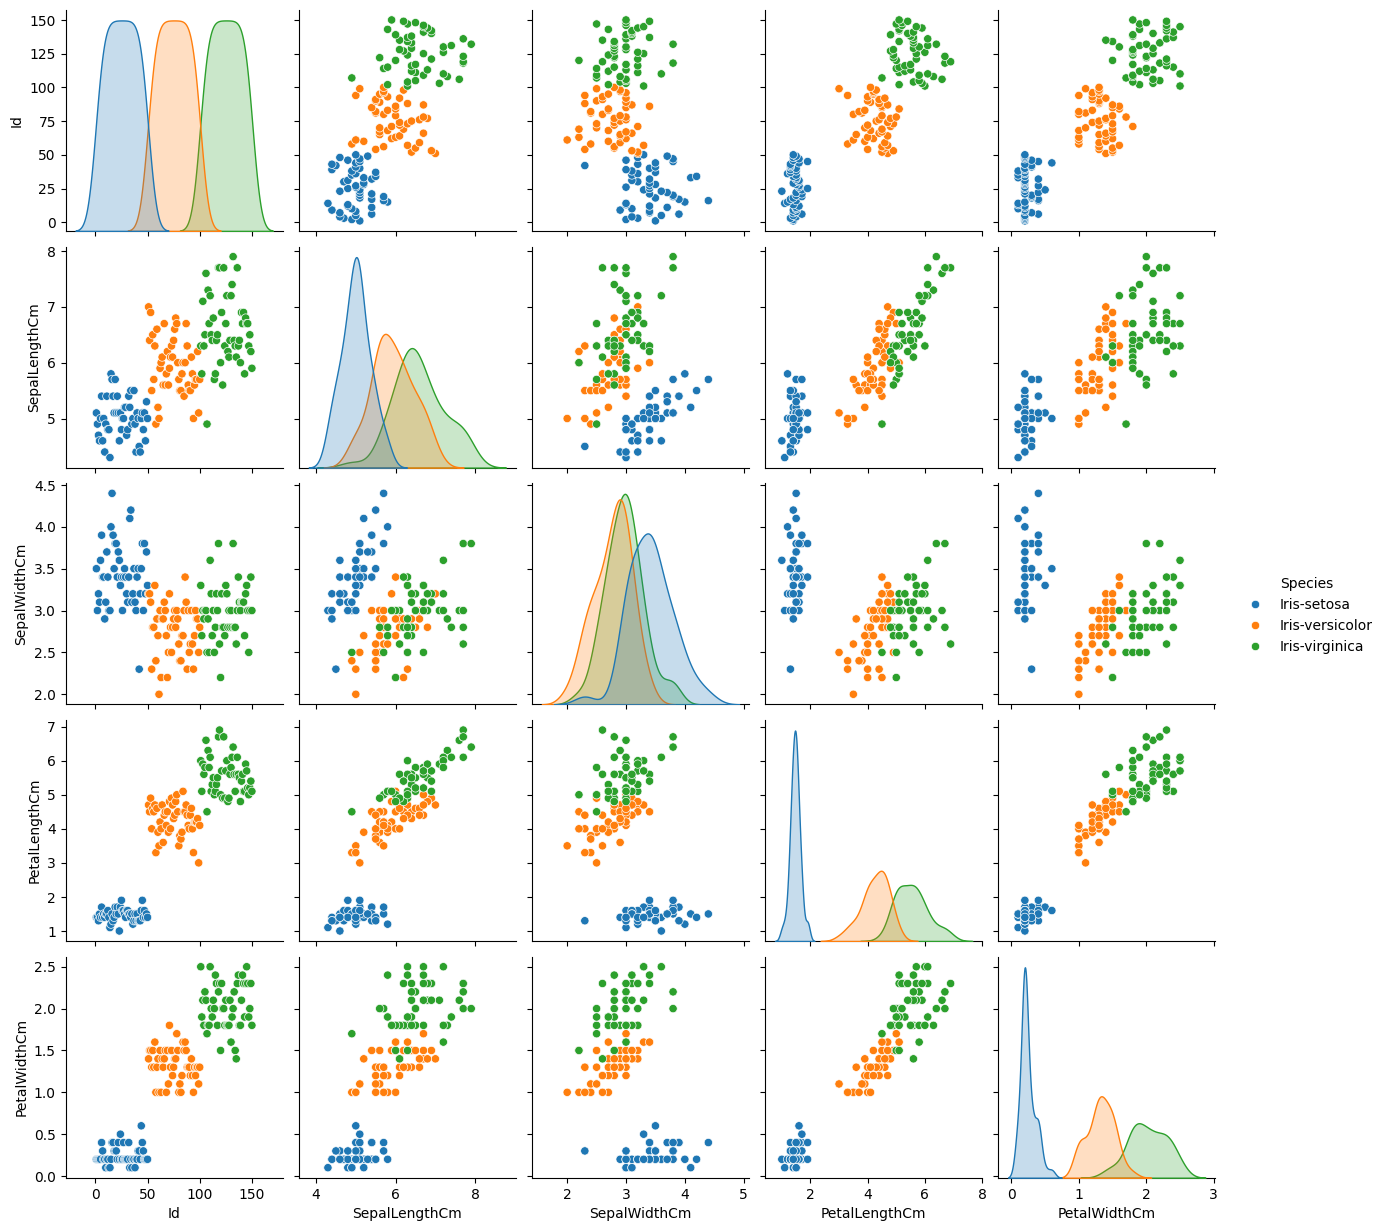

In [8]:
sns.pairplot(df,hue="Species")
plt.show()

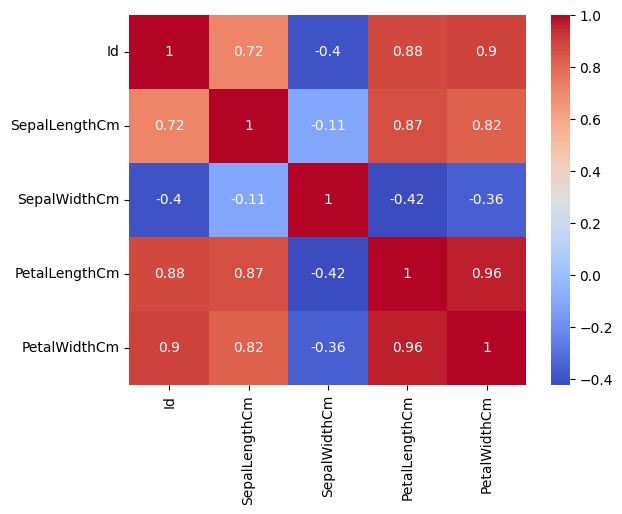

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop("Species", axis=1)   # all numeric columns
y = df["Species"]

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 5)
Test shape: (30, 5)


In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create dummy classifier (predicts most frequent class)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

# Predictions
y_pred_dummy = dummy.predict(X_test)

# Accuracy
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))

Baseline Accuracy: 0.3333333333333333


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create and train model
log_reg = LogisticRegression(max_iter=500)   # max_iter avoids convergence warnings
log_reg.fit(X_train, y_train)

# 2. Predictions
y_pred_lr = log_reg.predict(X_test)

# 3. Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Create & train KNN model (k=5 neighbors is default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2. Predictions
y_pred_knn = knn.predict(X_test)

# 3. Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [16]:
from sklearn.tree import DecisionTreeClassifier

# 1. Create & train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 2. Predictions
y_pred_dt = dt.predict(X_test)

# 3. Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create & train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf.predict(X_test)

# 3. Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [18]:
from sklearn.svm import SVC

# 1. Create & train SVM model
svm = SVC(kernel='linear')   # you can try 'rbf' or 'poly' later
svm.fit(X_train, y_train)

# 2. Predictions
y_pred_svm = svm.predict(X_test)

# 3. Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
SVM: 1.0000


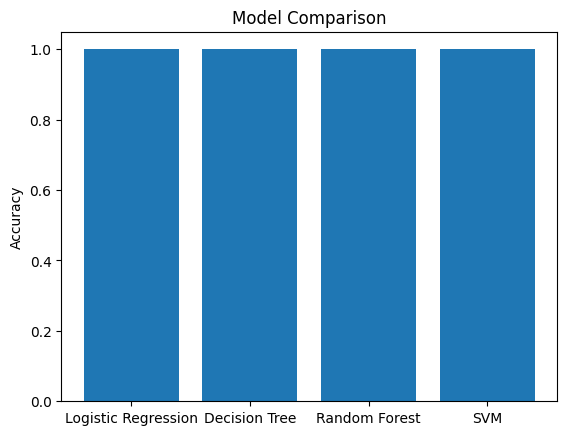

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
SVM: 1.0000


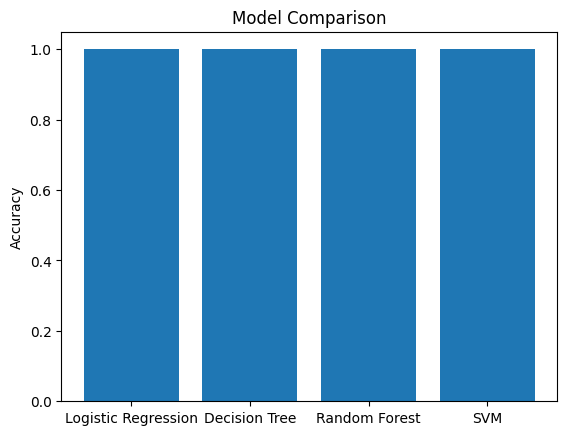

In [19]:
# Collect all accuracy scores
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Print results
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

# Plot comparison
import matplotlib.pyplot as plt

plt.bar(models.keys(), models.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()# Collect all accuracy scores
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Print results
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

# Plot comparison
import matplotlib.pyplot as plt

plt.bar(models.keys(), models.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # number of trees
    'max_depth': [None, 3, 5, 10],    # depth of trees
    'min_samples_split': [2, 5, 10]
}

# Create model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate on test set
best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 1.0
Tuned Random Forest Accuracy: 1.0


In [24]:
with open("Iris_Report.txt", "w") as f:
    f.write("Iris Classification Project\n")
    f.write("==========================\n\n")
    f.write("1. Introduction\n...")